In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(rc = {'figure.figsize':(16,9)})

## Import data and preprocessing

In [3]:
# Define columns name
column1 = ["machine_name", "cycle", "operational_setting_1", "operational_setting_2", "operational_setting_3"]
column2 = [f'sensor_measurement_{i:02}' for i in range(1,22)]
columns = column1 + column2

In [11]:
turbine = pd.read_csv('../data/train_FD002.txt', sep = "\s+", header = None, names = columns)

In [12]:
turbine.head()

,machine_name,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_01,sensor_measurement_02,sensor_measurement_03,sensor_measurement_04,sensor_measurement_05,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286


### create cencored data

If we look at the data above, the data we have does not include observations that are right-censored. To obtain such observations, we follow these steps:

1. Selecting the maximum cycle until the machine fails for each machine.
2. Assuming the end time limit of observation.

In [13]:
# Select maximum cycle
max_cycle = turbine.groupby(by = "machine_name")['cycle'].transform(max)
turbine = turbine[turbine["cycle"] == max_cycle].set_index('machine_name')
turbine.head()

,cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_01,sensor_measurement_02,sensor_measurement_03,sensor_measurement_04,sensor_measurement_05,sensor_measurement_06,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
machine_name,,,,,,,,,,,,,,,,,,,,,
1,149,42.0017,0.8414,100.0,445.00,550.49,1366.01,1149.81,3.91,5.71,...,129.55,2387.40,8066.19,9.4765,0.02,332,2212,100.0,10.45,6.2285
2,269,42.0047,0.8411,100.0,445.00,550.11,1368.75,1146.65,3.91,5.72,...,129.76,2388.42,8110.26,9.4315,0.02,334,2212,100.0,10.56,6.2615
3,206,42.0073,0.8400,100.0,445.00,550.80,1356.97,1144.89,3.91,5.72,...,130.02,2387.87,8082.25,9.4962,0.02,333,2212,100.0,10.46,6.3349
4,235,0.0030,0.0007,100.0,518.67,643.68,1605.86,1428.21,14.62,21.61,...,520.25,2388.17,8215.14,8.5784,0.03,397,2388,100.0,38.47,22.9717
5,154,42.0049,0.8408,100.0,445.00,550.53,1364.82,1146.87,3.91,5.72,...,130.05,2389.19,8151.36,9.4339,0.02,333,2212,100.0,10.74,6.3906


Next, we create a lollipop plot to obtain the distribution of maximum cycles for each machine.

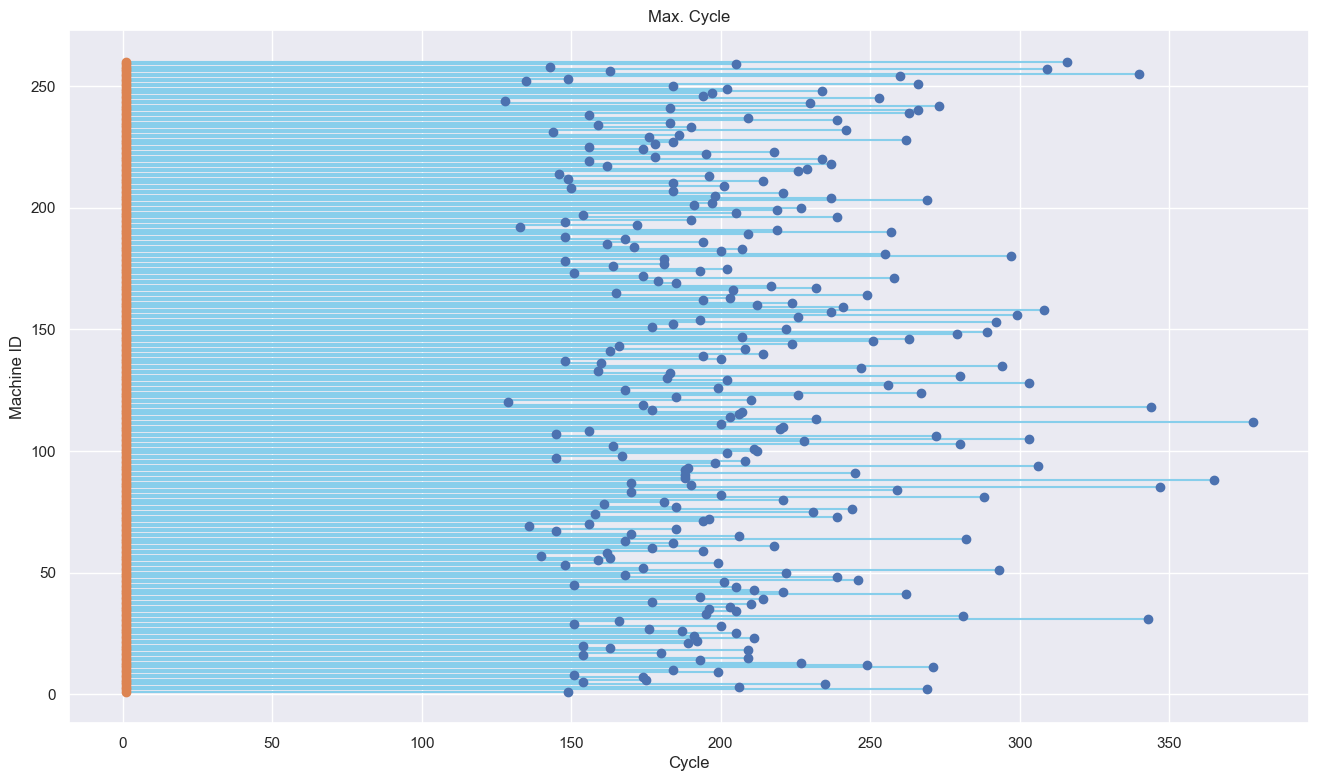

In [15]:
# Lollipop plot for each machine name
plt.hlines(y=turbine.index, xmin=1, xmax=turbine['cycle'], color='skyblue')
plt.plot(turbine['cycle'], turbine.index, "o")
plt.plot([1 for i in range(len(turbine))], turbine.index, "o")

# Add titles and axis names
plt.title("Max. Cycle")
plt.xlabel('Cycle')
plt.ylabel('Machine ID')

# Show the plot
plt.show()

We assume that the end time limit of observation is 220 cycles, so if a machine is still active after 220 cycles, it will be considered right-censored.

In [16]:
# create a status column for each machine
turbine['status'] = turbine['cycle'].apply(lambda x: False if x > 220 else True)

The True status of the machine indicates that the machine failed during the observation period, while False indicates that the machine did not experience a failure during the observation period.

In [18]:
# Distribution of each status
turbine['status'].value_counts()

status
True     179
False     81
Name: count, dtype: int64

In [20]:
# Change to category
category_columns = ['operational_setting_3', 'sensor_measurement_16']

turbine[category_columns] = turbine[category_columns].astype('category')
turbine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 1 to 260
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   cycle                  260 non-null    int64   
 1   operational_setting_1  260 non-null    float64 
 2   operational_setting_2  260 non-null    float64 
 3   operational_setting_3  260 non-null    category
 4   sensor_measurement_01  260 non-null    float64 
 5   sensor_measurement_02  260 non-null    float64 
 6   sensor_measurement_03  260 non-null    float64 
 7   sensor_measurement_04  260 non-null    float64 
 8   sensor_measurement_05  260 non-null    float64 
 9   sensor_measurement_06  260 non-null    float64 
 10  sensor_measurement_07  260 non-null    float64 
 11  sensor_measurement_08  260 non-null    float64 
 12  sensor_measurement_09  260 non-null    float64 
 13  sensor_measurement_10  260 non-null    float64 
 14  sensor_measurement_11  260 non-null    float64 

<Axes: >

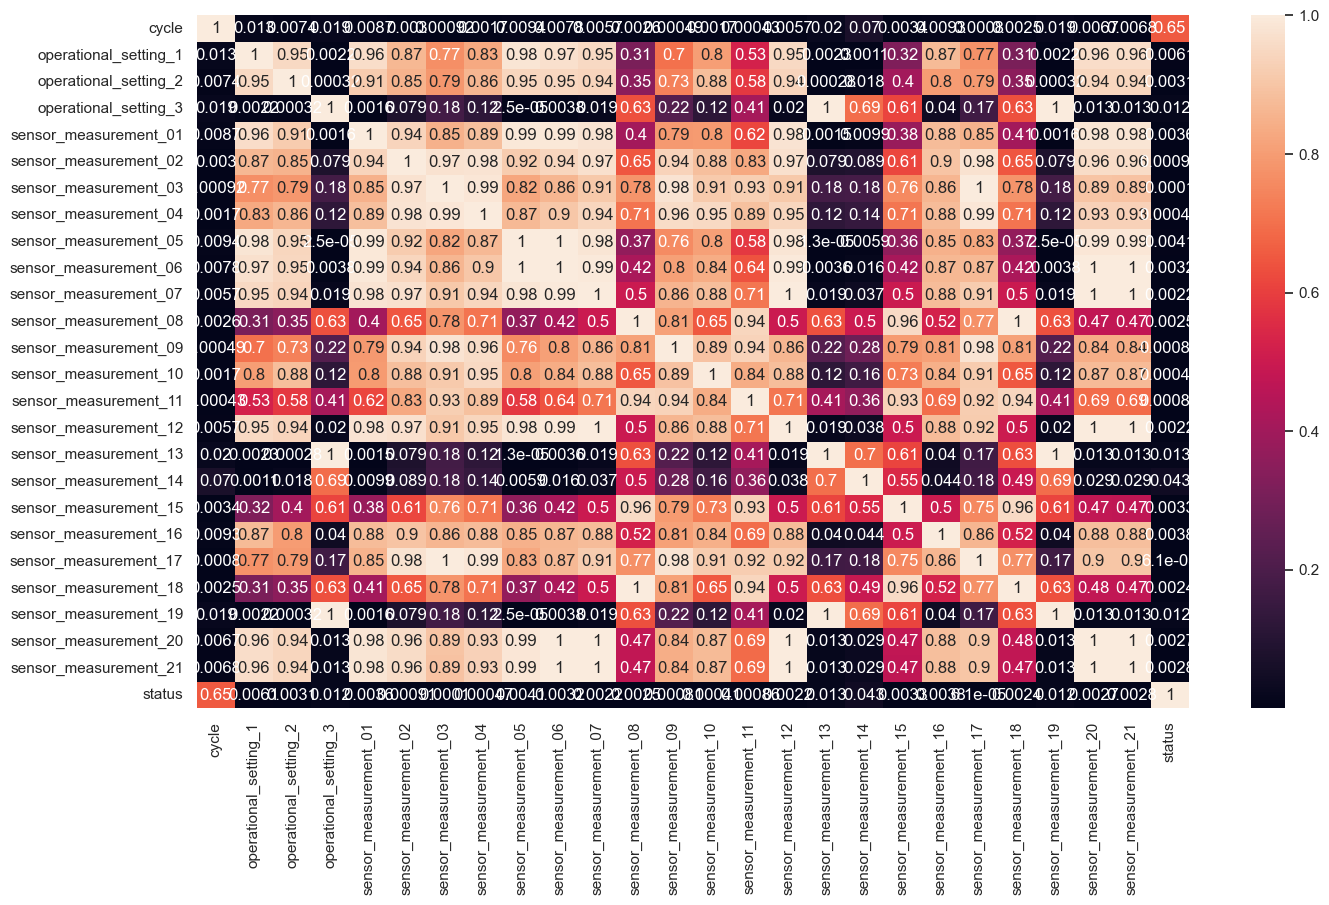

In [22]:
sns.heatmap(turbine.corr()**2, annot = True,)


<Axes: >

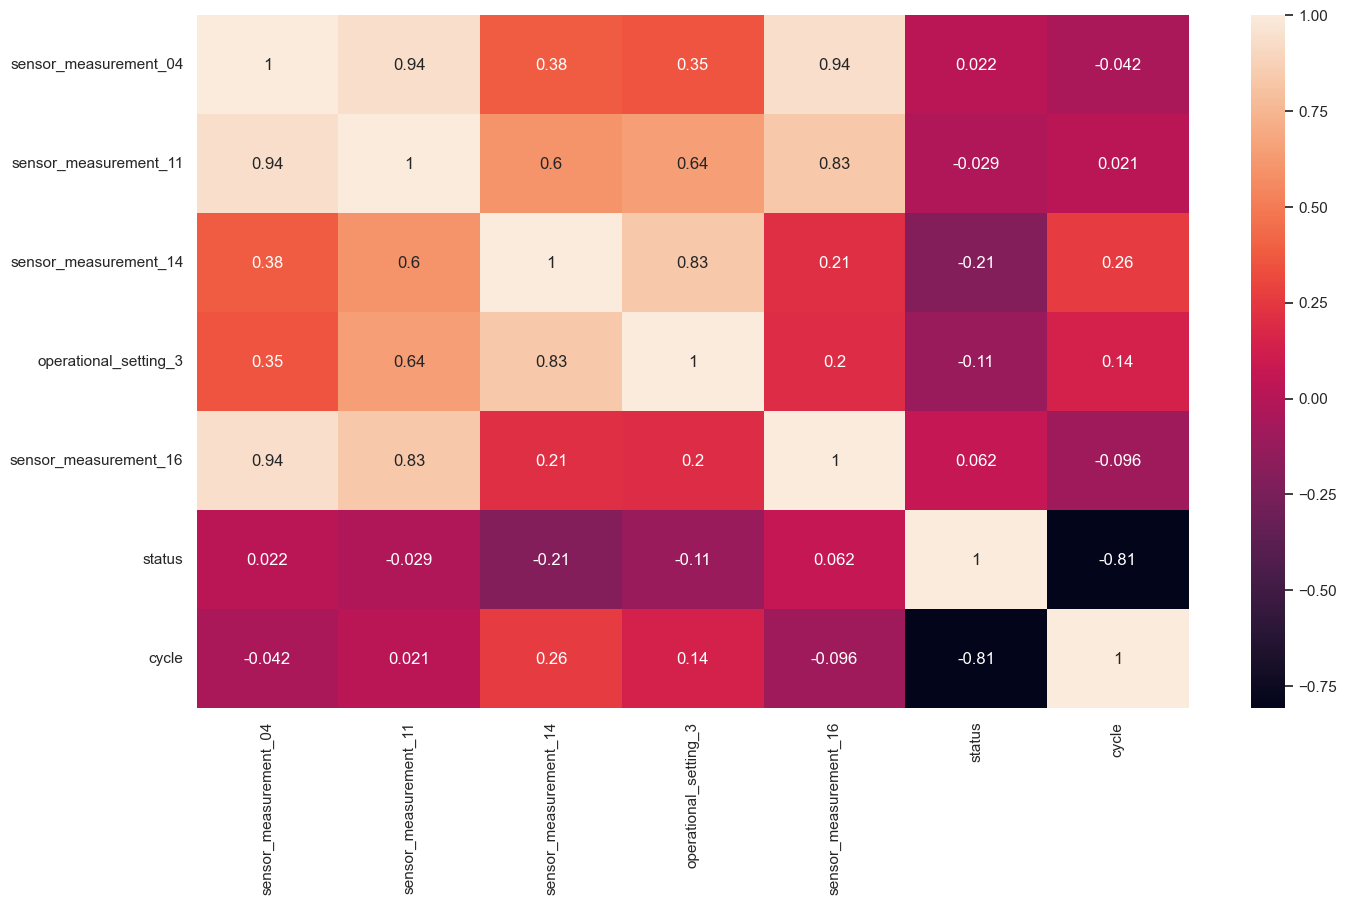

In [23]:
selected_columns = ['sensor_measurement_04','sensor_measurement_11','sensor_measurement_14']
cleaned_data = turbine.loc[:, selected_columns + category_columns + ['status', 'cycle']]
sns.heatmap(cleaned_data.corr(), annot = True)

## Data Preparation for Modeling


In [24]:
# One Hot Encoding for Categorical Variable
from sksurv.preprocessing import OneHotEncoder

data_x = OneHotEncoder().fit_transform(cleaned_data.iloc[:, :-2])
data_x.head()

,sensor_measurement_04,sensor_measurement_11,sensor_measurement_14,operational_setting_3=100.0,sensor_measurement_16=0.03
machine_name,,,,,
1,1149.81,42.77,8066.19,1.0,0.0
2,1146.65,42.64,8110.26,1.0,0.0
3,1144.89,42.85,8082.25,1.0,0.0
4,1428.21,48.25,8215.14,1.0,1.0
5,1146.87,42.67,8151.36,1.0,0.0


In [25]:
data_y = list(cleaned_data.loc[:, ["status", "cycle"]].itertuples(index = None, name = None))
data_y = np.array(data_y, dtype=[('status', bool), ('cycle', float)])
data_y[:5]

array([( True, 149.), (False, 269.), ( True, 206.), (False, 235.),
       ( True, 154.)], dtype=[('status', '?'), ('cycle', '<f8')])

### Kaplan Meier Estimator

Text(0.5, 0, 'time $t$')

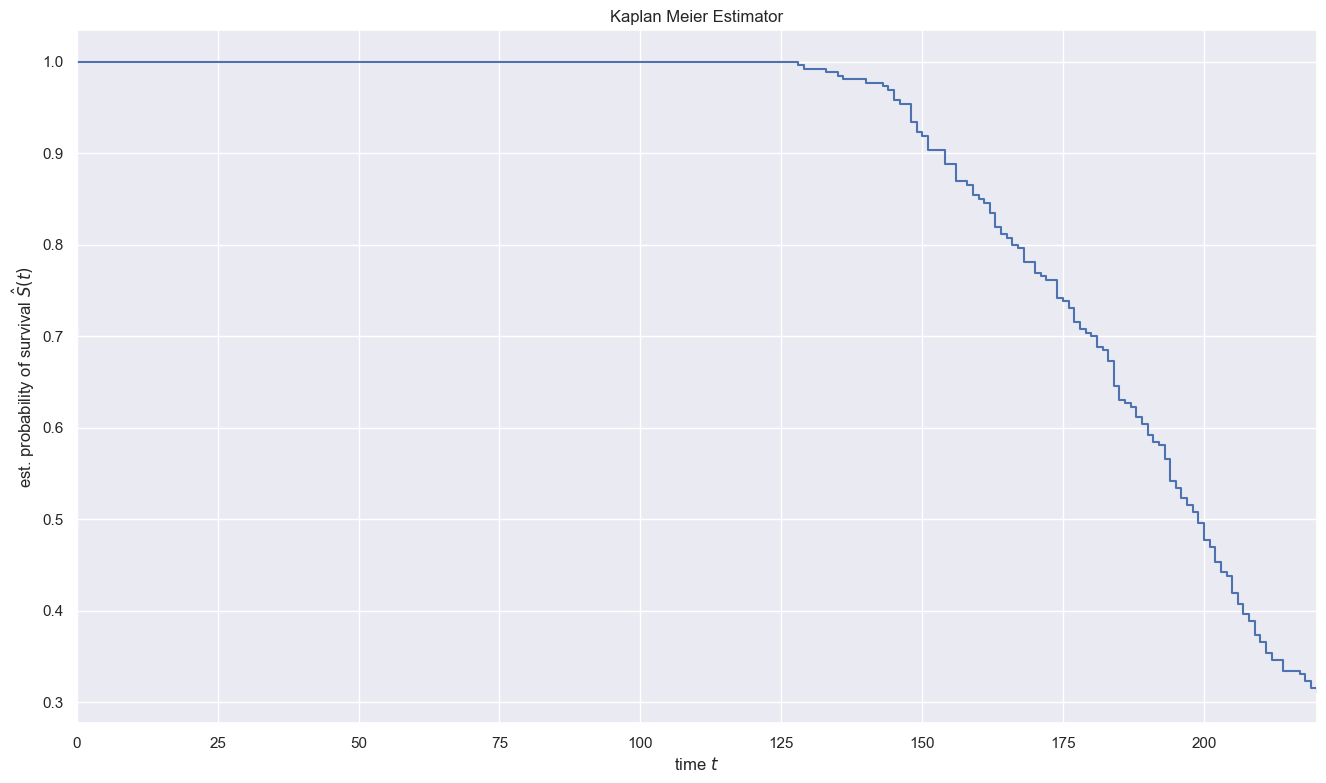

In [26]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["status"], data_y["cycle"])
time, survival_prob = np.append(0, time), np.append(1, survival_prob)

# Plotting
plt.step(time, survival_prob, where = "post")
plt.xlim(left = 0, right = 220)
plt.title("Kaplan Meier Estimator")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

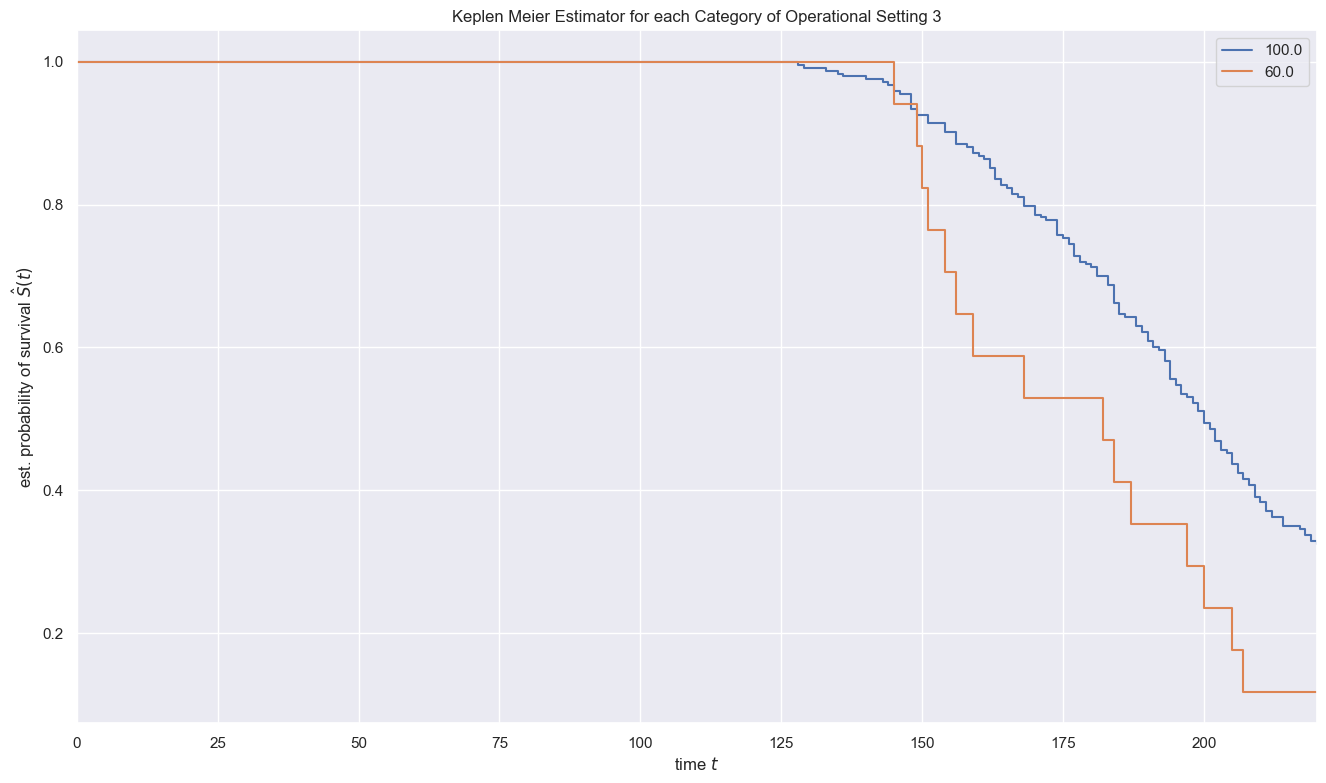

In [28]:
for category in cleaned_data['operational_setting_3'].unique():
    category_df = cleaned_data[cleaned_data['operational_setting_3'] == category]
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(category_df['status'],
                                                                     category_df['cycle'])
    time_treatment , survival_prob_treatment = np.append(0, time_treatment), np.append(1, survival_prob_treatment)
    plt.step(time_treatment, survival_prob_treatment, where = "post", label = category)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title(f"Keplen Meier Estimator for each Category of Operational Setting 3")
plt.legend(loc="best")
plt.xlim(left = 0, right = 220)
plt.show()

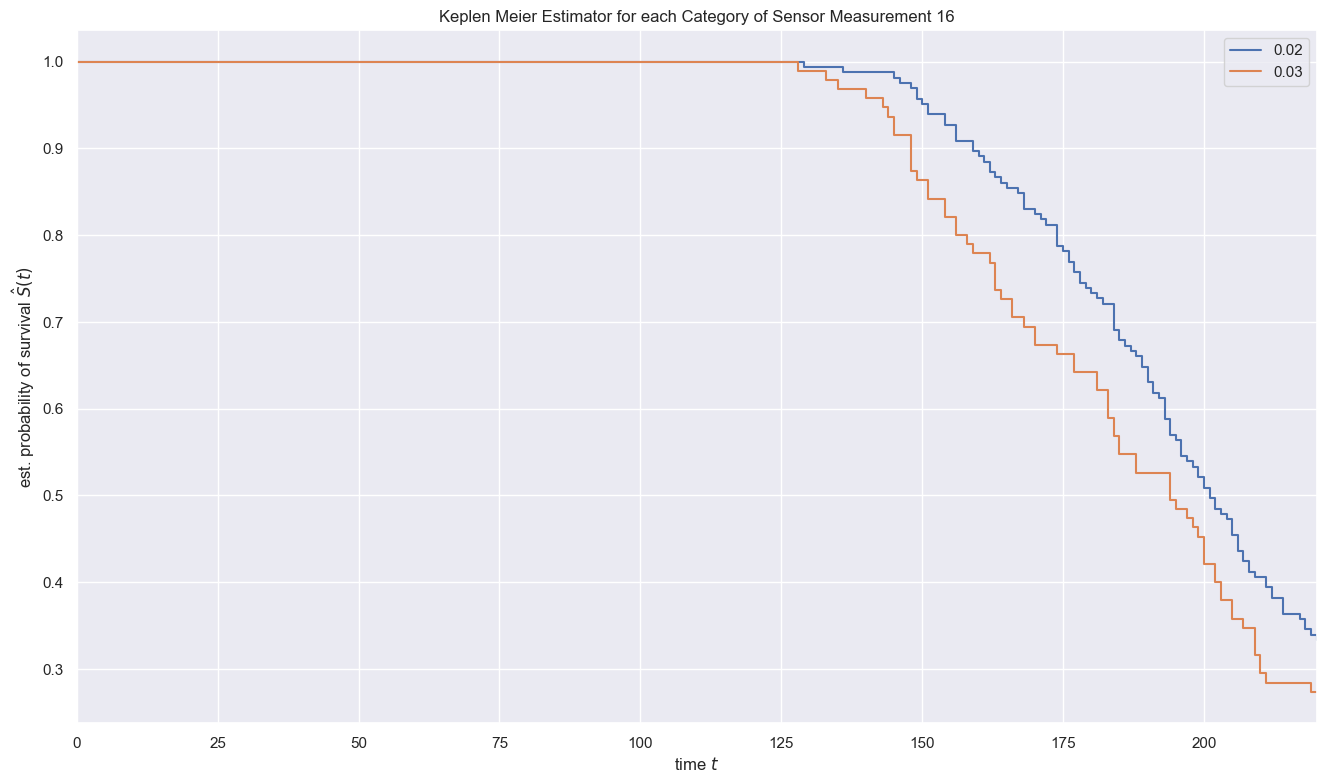

In [29]:
for category in cleaned_data['sensor_measurement_16'].unique():
    category_df = cleaned_data[cleaned_data['sensor_measurement_16'] == category]
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(category_df['status'],
                                                                     category_df['cycle'])
    time_treatment , survival_prob_treatment = np.append(0, time_treatment), np.append(1, survival_prob_treatment)
    plt.step(time_treatment, survival_prob_treatment, where = "post", label = category)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title(f"Keplen Meier Estimator for each Category of Sensor Measurement 16")
plt.legend(loc="best")
plt.xlim(left = 0, right = 220)
plt.show()

### log rank test

In [31]:
from sksurv.compare import compare_survival

p_value_list = []
for column in category_columns:
    p_value = compare_survival(data_y, turbine[column])[1]
    p_value_list.append(p_value)
    
result = pd.DataFrame({'columns': category_columns, 'p-value': p_value_list}).set_index('columns')
result['conclusion'] = result['p-value'].apply(lambda x: "significant" if x < 0.05 else "not significant")
result

,p-value,conclusion
columns,,
operational_setting_3,0.006857,significant
sensor_measurement_16,0.106360,not significant


In [32]:
data_x = data_x[data_x.columns[~data_x.columns.isin(["sensor_measurement_16=0.03"])]]

### Cox Propotional Hazard

In [33]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

# Define model
estimator = CoxPHSurvivalAnalysis(verbose = 10)

# Fitting model
estimator.fit(data_x, data_y)

iter      1: update = [-0.02672891  1.30951039  0.00897907 -6.14944208]
iter      1: loss = 3.4407602869
iter      2: update = [ 0.00043914 -0.0348166   0.00100936 -0.27206197]
iter      2: loss = 3.4389450619
iter      3: update = [-1.01083582e-05  6.09861344e-04 -3.68327374e-06 -1.80823588e-02]
iter      3: loss = 3.4389378698
iter      4: update = [ 1.34113716e-08 -7.92316764e-07  2.80717588e-09 -1.08672549e-04]
iter      4: loss = 3.4389378694
iter      4: optimization converged


CoxPHSurvivalAnalysis(verbose=10)

In [34]:
# Coef model
pd.Series(estimator.coef_, index = data_x.columns)

sensor_measurement_04          0.026300
sensor_measurement_11         -1.275303
sensor_measurement_14         -0.009985
operational_setting_3=100.0    6.439695
dtype: float64

Interpretation:

For every one-unit increase in sensor_measurement_04, the hazard rate (rate of failure) will increase by a factor of 1.02, assuming no changes in other covariates.

For every one-unit increase in sensor_measurement_11, the hazard rate will decrease by a factor of 0.32, assuming no changes in other covariates.

Using operational_setting_3 = 100 will increase the hazard rate by a factor of 523.21 compared to operational_setting_3 = 60, assuming no changes in other covariates.

### Model Evaluation

In [37]:
from sksurv.metrics import concordance_index_censored

# Cara 1
prediction = estimator.predict(data_x)
result = concordance_index_censored(turbine["status"], turbine["cycle"], prediction)
result[0]

0.6514374565785556

In [38]:
# Cara 2
estimator.score(data_x, data_y)

0.6514374565785556